<a href="https://colab.research.google.com/github/varundeepAvi/Assignments_April/blob/main/02_apr_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('content')

Mounted at content


A company has gathered data on salaries, company names, job roles, and educational qualifications of employees. The dataset includes information about whether each employee's salary exceeds
100k (1) or not (0). Using this data, the company aims to build a decision tree classification model to predict whether a new employee, based on their company, job role, and degree, is likely to have a salary exceeding $100k

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

In [6]:
data_salary=pd.read_csv('/content/content/MyDrive/Colab Notebooks/salaries.csv')

In [7]:
data_salary.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [8]:
data_salary.isna().sum()

company                  0
job                      0
degree                   0
salary_more_then_100k    0
dtype: int64

In [9]:
data_salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 640.0+ bytes


In [10]:
data_salary.describe()

,salary_more_then_100k
count,16.000
mean,0.625
std,0.500
min,0.000
25%,0.000
50%,1.000
75%,1.000
max,1.000


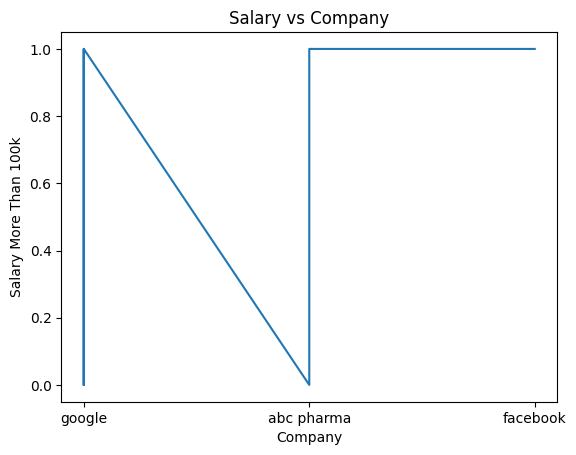

In [14]:
plt.plot(data_salary['company'], data_salary['salary_more_then_100k'])
plt.xlabel('Company')
plt.ylabel('Salary More Than 100k')
plt.title('Salary vs Company')
plt.show()

In [15]:
encoder=LabelEncoder()
data_salary['Encoded_company']=encoder.fit_transform(data_salary['company'])
data_salary['Encoded_job']=encoder.fit_transform(data_salary['job'])
data_salary['Encoded_degree']=encoder.fit_transform(data_salary['degree'])

In [16]:
X=data_salary[['Encoded_company','Encoded_job','Encoded_degree']]
y=data_salary['salary_more_then_100k']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [19]:
from sklearn.model_selection import GridSearchCV


dt_clf = DecisionTreeClassifier(max_depth=3,random_state=42)
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [20]:
from sklearn.metrics import accuracy_score
best_dt_clf = grid_search.best_estimator_
y_pred = best_dt_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Best Accuracy:", accuracy)

Best Accuracy: 0.8


In [21]:
from mlxtend.evaluate import bias_variance_decomp
mse, bias, variance = bias_variance_decomp(
    estimator=best_dt_clf,
    X_train=X_train.values,
    y_train=y_train.values,
    X_test=X_test.values,
    y_test=y_test.values,
    random_seed=42,
    loss='mse'
)

print("Mean Squared Error (MSE):", mse)
print("Bias:", bias)
print("Variance:", variance)

Mean Squared Error (MSE): 0.377
Bias: 0.19366499999999998
Variance: 0.183335


2.In this file using following columns build a model to predict if person would survive or not,PclassSexAgeFareCalculate score of your model

In [24]:
df_titanic=pd.read_csv('/content/content/MyDrive/Colab Notebooks/titanic.csv')


In [25]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
df_titanic.shape

(891, 12)

In [27]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
df_titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
df_titanic.Embarked=df_titanic.Embarked.fillna('S')

In [31]:
df_titanic.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
df_titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [33]:
df_titanic['FamilySize'] = df_titanic['SibSp'] + df_titanic['Parch']
df_titanic['FarePerPerson'] = df_titanic['Fare'] / (df_titanic['FamilySize'] + 1)
df_titanic['AgeGroup'] = pd.cut(df_titanic['Age'], bins=[0, 12, 18, 30, 50, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age', 'Fare'], axis=1)

In [34]:
df_titanic.isna().sum()

Survived           0
Pclass             0
Sex                0
Embarked           0
FamilySize         0
FarePerPerson      0
AgeGroup         177
dtype: int64

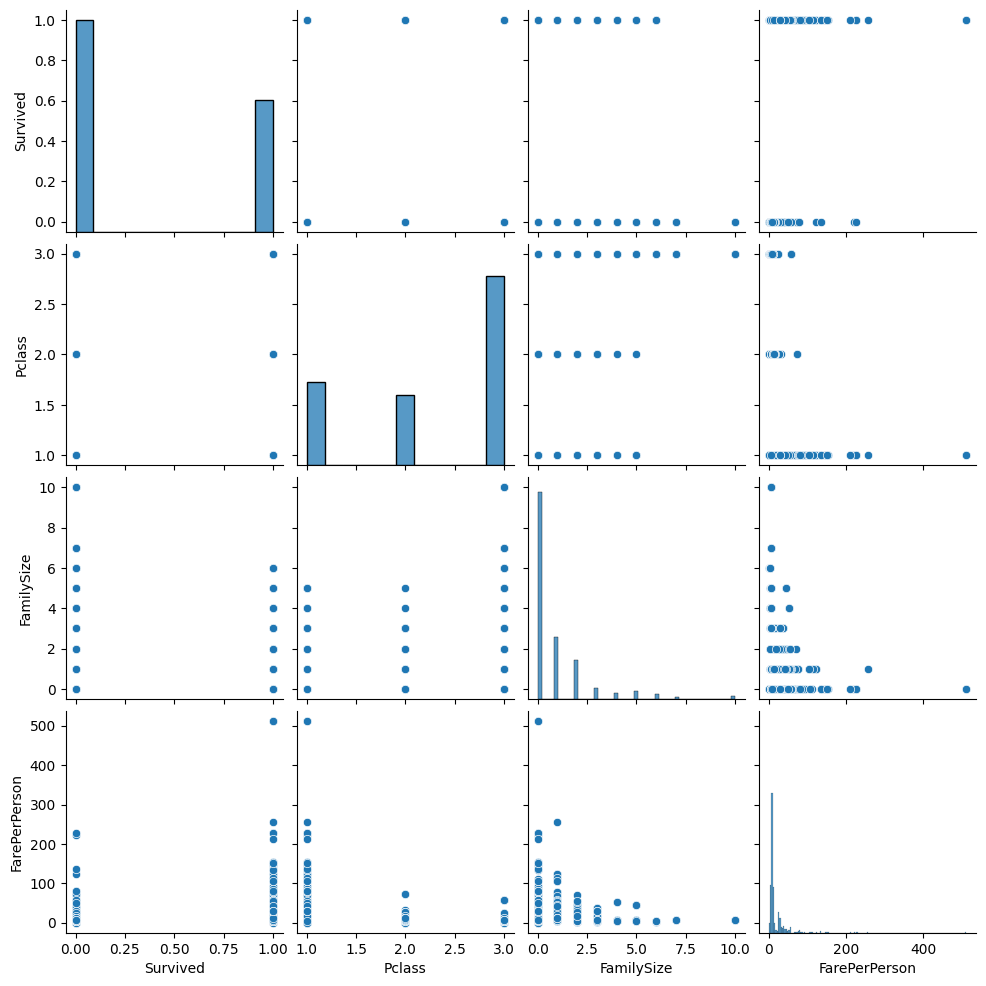

In [35]:
sns.pairplot(df_titanic)

In [36]:
df_titanic = pd.get_dummies(df_titanic, columns=['Sex', 'Embarked', 'AgeGroup'])


In [37]:
df_titanic.head()

,Survived,Pclass,FamilySize,FarePerPerson,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,AgeGroup_Child,AgeGroup_Teenager,AgeGroup_Young Adult,AgeGroup_Adult,AgeGroup_Senior
0,0,3,1,3.62500,0,1,0,0,1,0,0,1,0,0
1,1,1,1,35.64165,1,0,1,0,0,0,0,0,1,0
2,1,3,0,7.92500,1,0,0,0,1,0,0,1,0,0
3,1,1,1,26.55000,1,0,0,0,1,0,0,0,1,0
4,0,3,0,8.05000,0,1,0,0,1,0,0,0,1,0


In [38]:
X = df_titanic.drop(columns=['Survived'])
y = df_titanic['Survived']

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [40]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

In [41]:
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)

In [42]:
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, max_features='sqrt',
                                              min_samples_leaf=2,
                                              min_samples_split=5,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [44]:
best_clf = grid_search.best_estimator_

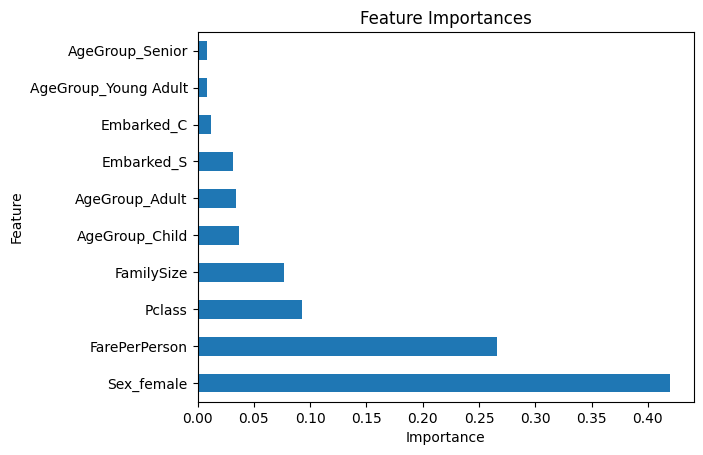

In [45]:
feat_importances = pd.Series(best_clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [46]:
X_test.shape

(179, 13)

In [51]:
y_pred = best_clf.predict(X_test)

In [50]:
y_pred1=best_clf.predict(X_train)

In [52]:
from sklearn.metrics import classification_report
accuracy_test = accuracy_score(y_test, y_pred)
accuracy_train=accuracy_score(y_train,y_pred1)
print("Accuracy_test:", accuracy_test)
print("Accuracy_train:",accuracy_train)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy_test: 0.8379888268156425
Accuracy_train: 0.8581460674157303

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87       110
           1       0.84      0.71      0.77        69

    accuracy                           0.84       179
   macro avg       0.84      0.81      0.82       179
weighted avg       0.84      0.84      0.83       179

